# Visualization

In this tutorial we're going to learn how to:
- Read in data tables (the easy way!)
- Select different samples from the data set
- Make figures to visualize the data

## Acknowledgement
The original source of this notebook is from the Python Flying Circus workshop designed by Chris Burns and Shannon Patel (Carnegie Observatories), updated June 2020 for the CASSI program.

In-file answers + additional exercises + comments/corrections + final exercise answer key file is completely by Pei Qin, updated June 30, 2020.

# Reading in data
Often, you will be given data in the form of an ASCII table.  This table will have multiple rows that indicate a star, or a galaxy, or a particle in a simulation, and the columns indicate different properties for the object such as its ID, brightness, mass, or distance.  Before we can select different samples of objects to study, we need to read in this data.  There are many ways to do this in Python: numpy, pandas, and astropy are commonly used packages.

- Pandas: http://pandas.pydata.org/pandas-docs/stable/10min.html
- Astropy: http://docs.astropy.org/en/stable/io/ascii/

Let's first import these packages. Again, use CTRL-ENTER to execute each cell.

In [1]:
import numpy as np
import pandas as pd
from astropy.io import ascii

Let's start with an example of reading in data into a Pandas `DataFrame`. Just as a `numpy` array is like a python list with extra super-powers, you can think of a Pandas `DataFrame` as an augmented `numpy` array with extra member functions to help you work with the data.

The data we will be using in this notebook should have been downloaded with the rest of the package into a "data" folder, so we use this for the file's location (e.g., your `Downloads` folder) in the next command. If the file isn't there, you'll get an error.

In [2]:
data1=pd.read_csv('data/SNIa_DM.dat',delim_whitespace=True, skiprows=4)

Note that we had to tell Pandas to skip the first 4 rows (comments) and use white-space (spaces and tabs) to delimit the columns.

We can now look at the properties of data1.  Such as its dimensions:

In [3]:
print(data1.shape)

(277, 5)


There are 277 rows and 5 columns.  What are the names of the columns?

In [4]:
print(data1.columns.values)

['SN' 'zcmb' 'DM' '+/-' 'survey']


And what if we want to peak at all of the properties of the first 5 SN? Pandas `DataFrames` act just like arrays in this respect. Use the `numpy` array slicing you learned in our last tutorial to print out only the first 5 rows of `data1`.

In [5]:
print(data1[:5])

         SN     zcmb      DM    +/-  survey
0   SN2001C  0.01109  33.295  0.086       1
1   SN2001G  0.01733  34.204  0.041       1
2   SN2001N  0.02207  34.807  0.213       1
3   SN2001V  0.01604  33.699  0.035       1
4  SN2001ah  0.05833  36.929  0.117       1


If you want to look at the entries for a specific row, or using something more complicated than a slice (e.g., an index array), you need to use the `iloc` attribute of a Pandas DataFrame.

In [6]:
print(data1.iloc[5])

SN        SN2001ay
zcmb       0.03091
DM          35.686
+/-          0.147
survey           1
Name: 5, dtype: object


We can also just select specific columns by using the names you found above.

In [7]:
print(data1['DM'])

0      33.295
1      34.204
2      34.807
3      33.699
4      36.929
        ...  
272    33.226
273    35.058
274    34.891
275    34.454
276    34.232
Name: DM, Length: 277, dtype: float64


Now see if you can print out just the first 5 rows of the `'DM'` column. Try other combinations of column names and row slices.

In [8]:
print(data1['DM'][:5])

0    33.295
1    34.204
2    34.807
3    33.699
4    36.929
Name: DM, dtype: float64


Note that the index is always shown here.  If we just want the raw data in the form of a numpy array, we just do the following:

In [9]:
print(data1['DM'].values)

[33.295 34.204 34.807 33.699 36.929 35.686 36.18  33.936 34.261 35.905
 33.883 33.561 33.794 33.503 35.241 34.42  36.293 35.527 31.775 36.013
 33.297 35.454 33.175 35.325 32.614 34.128 33.203 35.194 34.113 32.406
 33.774 35.527 35.103 35.773 34.364 34.81  34.627 34.897 34.706 35.326
 34.467 35.745 35.933 31.816 35.576 32.71  36.809 35.047 35.897 35.742
 32.386 35.908 34.782 35.425 33.959 34.008 33.025 35.417 35.525 36.345
 34.305 34.818 35.107 32.81  37.594 34.042 32.374 32.415 35.832 34.909
 35.174 34.004 32.198 33.5   33.824 34.034 35.331 35.381 35.629 36.522
 36.25  36.85  33.944 33.959 35.872 35.88  37.444 33.846 34.019 31.584
 31.646 34.592 34.627 36.348 34.568 35.684 35.734 35.216 35.351 35.243
 34.134 35.089 35.138 32.859 32.895 33.896 33.945 35.795 30.854 30.986
 34.765 36.024 34.94  34.182 34.28  35.487 35.093 35.133 35.284 33.366
 36.007 34.768 35.324 35.392 35.69  35.465 35.12  35.827 36.286 35.192
 34.442 34.941 36.622 34.847 36.084 34.322 34.378 34.518 34.645 34.225
 35.51

A nice feature of `pandas` dataframes is you can use a short-hand notation for specifying columns as member data, as long as the label of the column doesn't confuse `python`. So I can access the '`DM`' column this way:

In [10]:
print (data1.DM[0:5])

0    33.295
1    34.204
2    34.807
3    33.699
4    36.929
Name: DM, dtype: float64


Try to do the same thing with the '`+/-`' column. You should get an error. That's because the `+`, `/`, and `-` are all numerical operators in `python`, so you can't use them as part of member variable names. Same goes with having a column that starts with a number or hash (`#`), etc. To access those columns, you need to fall back on the string index:

In [11]:
#print(data1.+/-[:5])
print(data1['+/-'][:5])

0    0.086
1    0.041
2    0.213
3    0.035
4    0.117
Name: +/-, dtype: float64


Next, we do a similar exercise reading in the data into an astropy Table:

In [12]:
data2=ascii.read('data/SNIa_DM.dat')

print(data2.colnames)
print(data2[:5])
print(data2['DM'][:5])

['SN', 'zcmb', 'DM', '+/-', 'survey']
   SN      zcmb    DM    +/-  survey
-------- ------- ------ ----- ------
 SN2001C 0.01109 33.295 0.086      1
 SN2001G 0.01733 34.204 0.041      1
 SN2001N 0.02207 34.807 0.213      1
 SN2001V 0.01604 33.699 0.035      1
SN2001ah 0.05833 36.929 0.117      1
  DM  
------
33.295
34.204
34.807
33.699
36.929


Note that the `astropy.ascii` package requires fewer arguments (it's a little smarter about comments and delimiters), but `astropy` tables have a bit less functionality. Luckily, the `astropy` developers recognise that Pandas is pretty awesome, so you can convert an Astropy `Tables` object to a Pandas `DataFrame` object! (You can also convert Pandas DFs to Astropy Tables)

In [13]:
data3=data2.to_pandas()
print(data3[:5])

         SN     zcmb      DM    +/-  survey
0   SN2001C  0.01109  33.295  0.086       1
1   SN2001G  0.01733  34.204  0.041       1
2   SN2001N  0.02207  34.807  0.213       1
3   SN2001V  0.01604  33.699  0.035       1
4  SN2001ah  0.05833  36.929  0.117       1


The `astropy.io` module also has the ability to read `FITS` images and tables and understands *way* more data formats common to astronomers than `pandas`. So a good strategy is to use `astropy.io` to read in the data, and then convert it to a `pandas` dataframe. Or, you might find that `astropy.tables` are sufficent for your needs.

## Merging Tables

Something we do all the time is take one table of data and merge it with another table, based on the value in one or more columns that match. Here, `pandas` has a very handy method we can use. As an example, we have another data file, `data/SN_HostMass.dat`, that contains galaxy host masses for some of the supernovae in the `data/SNIa_DM.dat` file. Load up this data, call it `data4`, and print out its shape, and print out the first five lines.

In [14]:
data4=ascii.read('data/SN_HostMass.dat')
data4=data4.to_pandas()  # need to do the conversion or else the DataFrame won't match
print(data4[:5])

         SN   Mass  eMass
0  SN2004dt  10.78    0.2
1  SN2004ef  10.90    0.2
2  SN2004ef  10.80    0.2
3  SN2004eo  11.13    0.2
4  SN2004ey  10.04    0.2


The simplest thing we can do is merge the two tables using the supernova name (column `SN`) to do the matching:

In [15]:
merged = pd.merge(data3,data4, on='SN')
print (merged[0:7])
print (merged.shape)

         SN     zcmb      DM    +/-  survey   Mass  eMass
0  SN2002fk  0.00662  32.406  0.035       1  10.39    0.2
1  SN2003du  0.00665  32.710  0.036       1   8.87    0.2
2  SN2004ef  0.02977  35.425  0.048       1  10.90    0.2
3  SN2004ef  0.02977  35.425  0.048       1  10.80    0.2
4  SN2004eo  0.01474  33.959  0.032       2  11.13    0.2
5  SN2004ey  0.01463  34.008  0.021       2  10.04    0.2
6  SN2004gc  0.03071  35.417  0.123       2  10.52    0.2
(157, 7)


This creates a table with the combined columns. Note that the table has fewer rows than `data3`, but more rows than `data4`. In cases where a SN is missing from either table, that row is dropped from the final table. In cases where multiple lines match, you get all combinations (notice that `SN2004ef` shows up four times because it is repeated in both tables). This is called an "inner join". If you want to include rows with missing data, you can specify the `how` argument:
 - `how = "inner"`:  (default) only include rows that match in both input tables
 - `how = "left"`: include all rows from the first table, but with possible missing data
 - `how = "right"`: include all rows form the second table, but with possible missing data
 - `how = "outer"`: include all rows from both tables, but with possible missing data
 
If there is a one-to-one correspondence between the rows in both tables, then these are all equivalent. For more information about how to combine tables, consult the [`Pandas` Documentation](https://pandas.pydata.org/pandas-docs/stable/merging.html). Try using a different `how` argument in the command above and see what happens.

In [16]:
print(data3.shape, data4.shape)
mergebase3=pd.merge(data3,data4, on=('SN','SN'), how = "left")
print(mergebase3)

(277, 5) (132, 3)
           SN     zcmb      DM    +/-  survey   Mass  eMass
0     SN2001C  0.01109  33.295  0.086       1    NaN    NaN
1     SN2001G  0.01733  34.204  0.041       1    NaN    NaN
2     SN2001N  0.02207  34.807  0.213       1    NaN    NaN
3     SN2001V  0.01604  33.699  0.035       1    NaN    NaN
4    SN2001ah  0.05833  36.929  0.117       1    NaN    NaN
..        ...      ...     ...    ...     ...    ...    ...
273  SN2009ag  0.00925  33.226  0.036       2  10.53    0.2
274  SN2009al  0.02328  35.058  0.064       2  10.82    0.2
275  SN2009cz  0.02198  34.891  0.035       2  10.99    0.2
276  SN2009ds  0.02047  34.454  0.034       2  10.96    0.2
277  SN2009le  0.01703  34.232  0.030       2  10.92    0.2

[278 rows x 7 columns]


## Writing data
Writing data in Pandas is just as simple as reading it in:

In [17]:
data3.to_csv('data/output.dat',index=False,sep=' ')
# the 'index' keyword gives you the option of also printing the Pandas index
# the 'sep' keyword specifies the delimiter between columns

In [18]:
# unsuccessful in making all the columns line up, but much better, \t = tab
data3.to_csv('data/formatted_output.dat', index = False, sep='\t',escapechar="")

# Selecting Data
Most of the time you will be dealing with subsets of your data set, e.g., galaxies at a certain redshift, stars at a particular distance or brightness, you want to get rid of outliers, etc.  We therefore need to select the desired sample using conditionals.  We'll use a Pandas DataFrame as an example. Here, we create a `pandas` column called `ix` that contains True/False values for each row in `data1` based on a condition:  True if redshift is less than 0.02, False otherwise. This new array, if used as an index, will pick out only those rows that are True. This is often referred to as creating a 'mask'.

In [19]:
# array containing T/F val, mask for filtering and returning only T rows
ix = (data1.zcmb < 0.02)
print(data1[ix][0:5])

         SN     zcmb      DM    +/-  survey
0   SN2001C  0.01109  33.295  0.086       1
1   SN2001G  0.01733  34.204  0.041       1
3   SN2001V  0.01604  33.699  0.035       1
7  SN2001bf  0.01520  33.936  0.135       1
8  SN2001da  0.01598  34.261  0.142       1


Try selecting the data from each survey and compute its median redshift. Hint: the dataframes and columns have a `median` function. 

In [20]:
print(data1)
sur1 = (data1.survey == 1)
print(data1[sur1])
sur2 = (data1.survey == 2)
print(data1[sur2])
median1 = data1[sur1]['zcmb'].median()
median2 = data1[sur2].zcmb.median()
print(median1, median2)
print(data1['zcmb'].median())

           SN     zcmb      DM    +/-  survey
0     SN2001C  0.01109  33.295  0.086       1
1     SN2001G  0.01733  34.204  0.041       1
2     SN2001N  0.02207  34.807  0.213       1
3     SN2001V  0.01604  33.699  0.035       1
4    SN2001ah  0.05833  36.929  0.117       1
..        ...      ...     ...    ...     ...
272  SN2009ag  0.00925  33.226  0.036       2
273  SN2009al  0.02328  35.058  0.064       2
274  SN2009cz  0.02198  34.891  0.035       2
275  SN2009ds  0.02047  34.454  0.034       2
276  SN2009le  0.01703  34.232  0.030       2

[277 rows x 5 columns]
           SN     zcmb      DM    +/-  survey
0     SN2001C  0.01109  33.295  0.086       1
1     SN2001G  0.01733  34.204  0.041       1
2     SN2001N  0.02207  34.807  0.213       1
3     SN2001V  0.01604  33.699  0.035       1
4    SN2001ah  0.05833  36.929  0.117       1
..        ...      ...     ...    ...     ...
217  SN2007cp  0.03772  36.033  0.138       1
228  SN2007qe  0.01886  34.988  0.039       1
230  SN200

In [21]:
# testing mean instead
mean1 = data1[sur1]['zcmb'].mean()
mean2 = data1[sur2].zcmb.mean()
print(mean1, mean2)
meanall = data1['zcmb'].mean()
print(meanall)
# should give the same result as meanall
(mean1*156+mean2*121)/277

0.02467769230769232 0.02767198347107439
0.0259856678700361


0.02598566787003611

# Plotting
The most popular plotting package in Python is `matplotlib` but there are several others one might want to explore.  Here we will show you how to make basic plots in matplotlib.  The references below are useful:

- http://matplotlib.org/gallery.html
- http://matplotlib.org/api/pyplot_api.html

First, let's invoke an iPython [magic command](http://ipython.readthedocs.io/en/stable/interactive/magics.html) (i.e., beginning with a %) so that the plots that are made will show up in this notebook.

In [22]:
%matplotlib inline

`pyplot` is the main plotting function in `matplotlib`, it is commonly imported on its own as `plt`.

In [23]:
import matplotlib.pyplot as plt

Now let's make some fake data to play with and plot. Create an array `x` from 0 to 9 inclusive (this is just a suggestion, you can make whatever `x` you want). Now make a new array `y` that is the square of `x` (or whatever function you like).

In [24]:
x = np.arange(0,10)
y = x**2
print(x,y)

[0 1 2 3 4 5 6 7 8 9] [ 0  1  4  9 16 25 36 49 64 81]


Armed with this data, this is probably the quickest way to make a figure:

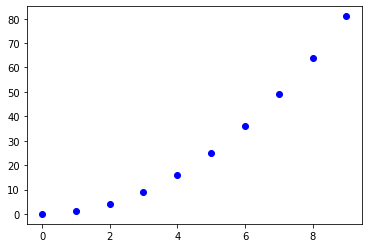

In [25]:
plt.plot(x,y,'bo')

# The string 'bo' above indicates that the points will be blue(b) circles(o)

Note that `matplotlib` does a lot of things automatically for you, like setting the limits on the axes as well as the interval between major tick marks.  These are all things that you can adjust manually with more code.

Below is the long form to getting the same symbols as above.  By including more code, you can start to tinker around with different aspects of the plot. Many of matplotlib's optional arguments have a long and short form (e.g., you can specify `linestyle='-'` or the shorter `ls='-'`. Try different linestyles: '--', '-.'. Try different symbols: 's', 'd', '*'.

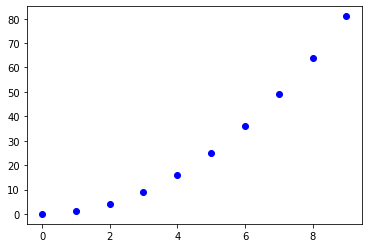

In [26]:
plt.plot(x,y,color='blue',marker='o',ms=6,ls='None')

Yet another way to make the same plot, using the `scatter` function:

/Users/Helen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


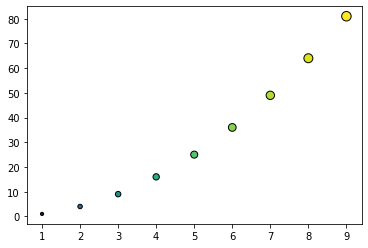

In [27]:
plt.scatter(x,y,s=10*np.sqrt(y),c=np.log10(x),edgecolors='black')
# the plotting function ignores value that is unplottable and will give an error like this:

The above examples are the quickest, easiest ways to produce a figure in `matplotlib` and are great for quick and dirty data exploration.  However, when it comes time to make "publication quality" graphs, you'll find that including more lines of code will make things easier down the road as it will provide for more functionality.  Below, we invoke the `subplots` function, which returns `figure` and `axis` objects.  We can also play around with the colors, symbols, and line styles. This way of using `matplotlib` is more *pythonic*. The previous way was more akin to using `MATLAB` and it was the developer's intention to make it more intuitive. Most examples use the *pythonic* methods.

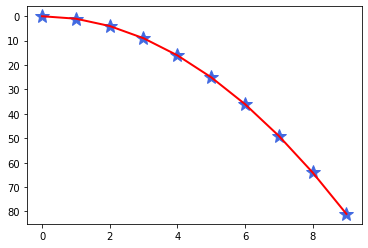

In [28]:
fig, ax = plt.subplots()

# We then use ax to do our plotting
ax.plot(x,y,color='royalblue',marker='*',ms=15,ls='None')
ax.plot(x,y,color='red',ls='-',lw=2,alpha=1)
ax.invert_yaxis()

# read more about what "fig, ax" means here: https://stackoverflow.com/questions/34162443/why-do-many-examples-use-fig-ax-plt-subplots-in-matplotlib-pyplot-python

So this produces the same kind of plot as above, but now we can use `ax` to play with the axes:

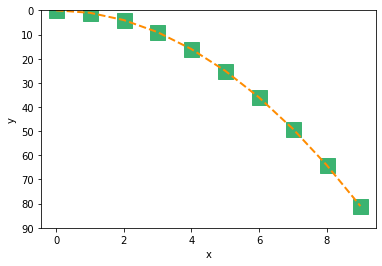

In [29]:
fig, ax = plt.subplots()
ax.set_ylim((90,0))           # set limits on y-axis
ax.set_xlabel('x') # set label for x-axis
ax.set_ylabel('y') # set label for y-axis
ax.plot(x,y,color='mediumseagreen',marker='s',ms=15,ls='None')
ax.plot(x,y,color='darkorange',ls='--',lw=2)

Often, you'll want an axis to be on a logarithmic scale:

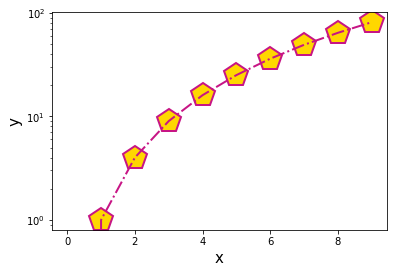

In [30]:
fig, ax = plt.subplots()

ax.set_yscale('log') # set y-axis to be in log

ax.set_xlabel('x',fontsize=15)
ax.set_ylabel('y',fontsize=15)
ax.plot(x,y,color='gold',mec='mediumvioletred',mew=2,marker='p',ms=25,ls='None')
ax.plot(x,y,color='mediumvioletred',ls='-.',lw=2)

## Multiple figures

Sometimes you'll want two figures side-by-side, or a grid of 3x3, etc, etc...

Text(0.5, 0, 'x')

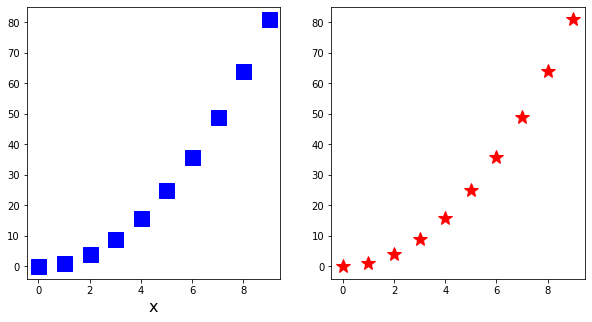

In [31]:
# two figures, side by side:
fig, axarr = plt.subplots(1,2,figsize=(10,5))

# axarr is an array of axis objects, with each element representing one subplot

# first subplot
ax=axarr[0]
ax.plot(x,y,color='blue',marker='s',ms=15,ls='None')

# second subplot
ax=axarr[1]
ax.plot(x,y,color='red',marker='*',ms=15,ls='None')

# change title on first subplot
ax=axarr[0]
ax.set_xlabel('x',fontsize=16)

Using subplots, which returns an axis array, is useful for going back and forth between different figures.  Note how we can go back to `axarr[0]` at the end and change the label on the x axis.

If you have a bunch of images or the same type of figure for multiple objects, it helps to make a giant grid of subplots.  And rather than manually declaring a new subplot each time, it helps to automate the process with `for` loop(s).

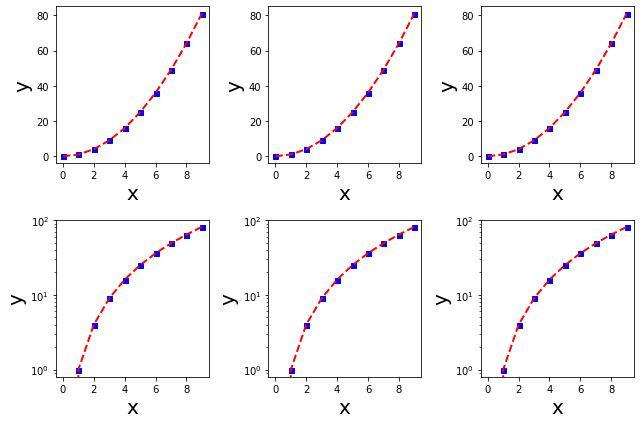

In [32]:
nrow=2
ncol=3
fig, axarr = plt.subplots(nrow,ncol,figsize=(9,6))

for ii in range(nrow):
    for jj in range(ncol):
        ax=axarr[ii,jj]
        if ii==nrow-1: ax.set_yscale('log')
        ax.set_xlabel('x', fontsize=20)
        ax.set_ylabel('y', fontsize=20)
        ax.plot(x,y,color='blue',marker='s',ms=5,ls='None')
        ax.plot(x,y,color='red',ls='--',lw=2)
fig.tight_layout()

`subplots` has many useful features, like the the `sharex` and `sharey` keywords, which allow you to declare that the axes for each subplot have the same scale.  Invoking `subplots_adjust` can then optionally allow you to squish the subplots together. 

(0.0, 20.0)

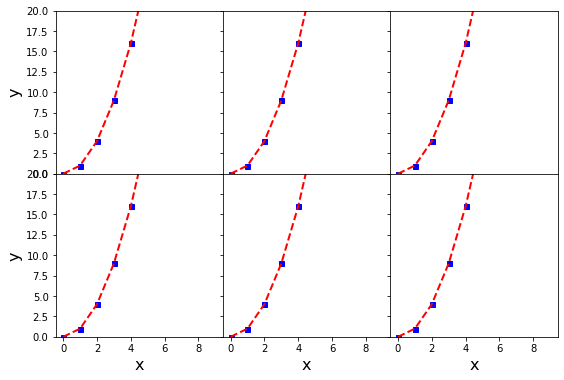

In [33]:
nrow=2
ncol=3
fig, axarr = plt.subplots(nrow,ncol,figsize=(9,6),sharex=True,sharey=True)
plt.subplots_adjust(hspace=0,wspace=0)

for ii in range(nrow):
    for jj in range(ncol):
        ax=axarr[ii,jj]
        if ii==nrow-1:
            ax.set_xlabel('x',fontsize=16)
        if jj==0:
            ax.set_ylabel('y',fontsize=16)
        ax.plot(x,y,color='blue',marker='s',ms=5,ls='None')
        ax.plot(x,y,color='red',ls='--',lw=2)
        # In this version of matplotlib the developers changed the tick marks to be out by default.
        # Uncomment the next line and see if you can spot the difference
        # ax.tick_params(direction='in')
axarr[1,2].set_ylim(0,20)

# Labeling
Legends, text labels, Latex

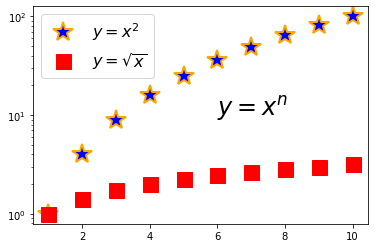

In [34]:
x=np.arange(10)+1.
y1=x**2
y2=np.sqrt(x)

fig, ax = plt.subplots()
ax.set_yscale('log')
# The `label` keyword below is used to specify the label for the particular data set
ax.plot(x,y1,color='blue',mec='orange',mew=2,marker='*',ms=20,ls='None',label='$y=x^2$')
ax.plot(x,y2,color='red',marker='s',ms=15,ls='None',label='$y=\sqrt{x}$')
ax.text(6,10,'$y=x^{n}$',fontsize=24) # this is in data coordinate (i.e. this is plotted at x=6, y=10=10^1 in the plot)
ax.legend(loc='upper left',fontsize=16,numpoints=1)

## Other useful types of figures: 
- Error bars: We're scientists! Almost every data point you put on a figure should have an error bar.
- Histograms: useful for looking at distribution of values for a particular variable
- Images: e.g., cutouts of stars, galaxies, nebulae, etc.
- Many others that we don't have time to cover here!

Error bars:

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.] [  1.   4.   9.  16.  25.  36.  49.  64.  81. 100.]


<ErrorbarContainer object of 3 artists>

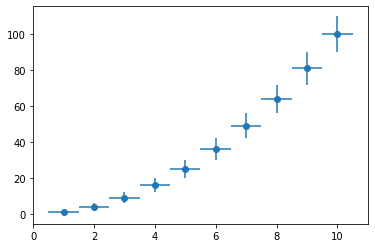

In [35]:
# first, generate some fake data
x=np.arange(10)+1.
y=x**2
print(x,y)

xerr=np.zeros(10)+0.5 # fixed error in x
yerr=np.sqrt(y) # Poisson error in y

plt.errorbar(x,y,xerr=xerr,yerr=yerr,marker='o',ls='None')

Histogram of Gaussians:

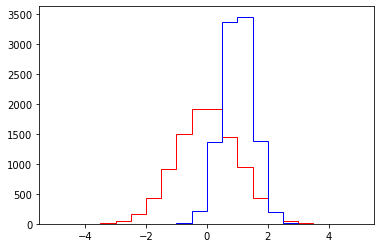

In [36]:
import numpy.random as npr

x1=npr.randn(10000)        # mean=0, std=1.0
x2=npr.randn(10000)*0.5+1. # mean=1, std=0.5

bins=np.linspace(-5.,5.,21)

info1 = plt.hist(x1,bins=bins, color='red',lw=1, histtype='step')
info2 = plt.hist(x2,bins=bins, color='blue',lw=1, histtype='step')

 Display an image from a FITS file.  First download this file: [im3433.fits](https://dl.dropboxusercontent.com/u/28917100/carnegie/summer2016/im3433.fits)

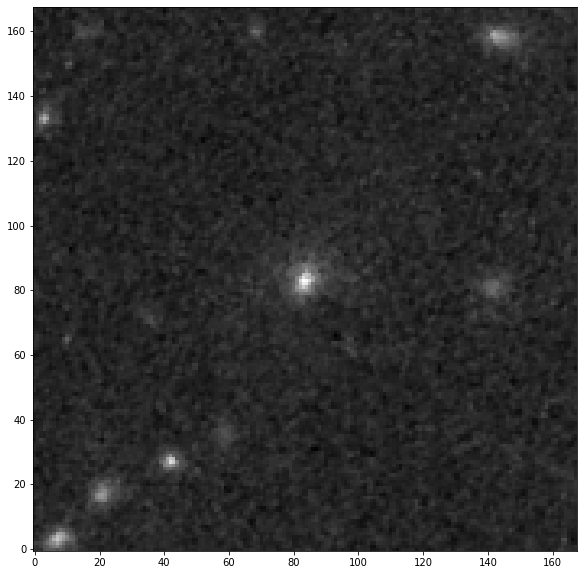

In [37]:
# Display an image from a FITS file

from astropy.io import fits

im3433=fits.open('data/im3433.fits')
im=im3433[0].data # the first extension (i.e., index 0), contains the image data

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(im,interpolation='none',origin='lower',cmap='gray')
#ax.get_xaxis().set_visible(False) # comment out these two lines to see what happens
#ax.get_yaxis().set_visible(False)

# Doing some math on images

Here's another example using some supernova data, which will have been downloaded as part of our github package.

We will plot these two images side-by-side. We specify `vmin=-40` and `vmax=40` in the `imshow()` function, which will set appropriate
limits on the color map (there are saturated pixels that will cause the image to be washed out otherwise). We also choose the
reverse color map (`gray_r`). Question: where's the supernova? 

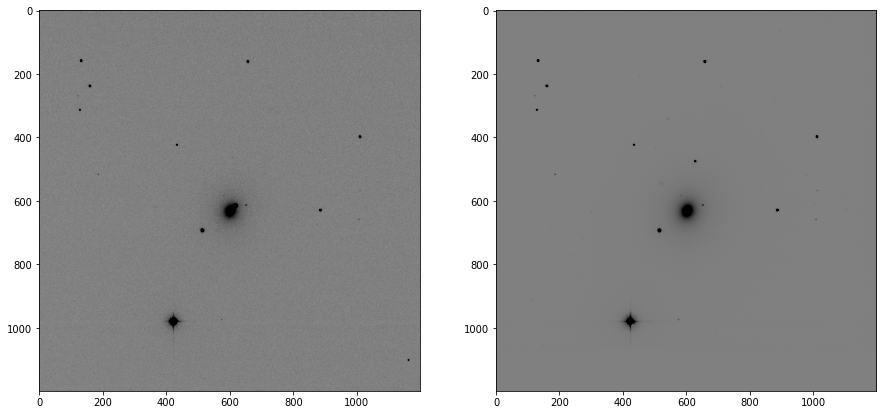

In [38]:
im1 = fits.open('data/SN2011iv_B_SWO_DC_2011_12_11SN.fits')
im2 = fits.open('data/SN2011iv_B_template.fits')
fig,ax = plt.subplots(1,2, figsize=(15,8))
ax[0].imshow(im1[0].data, vmin=-40,vmax=40, cmap='gray_r')
ax[1].imshow(im2[0].data, vmin=-40, vmax=40, cmap='gray_r')

These two images are from different epochs. So if you subtract one from the other and plot out the results, the supernova (and anything else that changed) should stand out. Try this. There's a surprise.

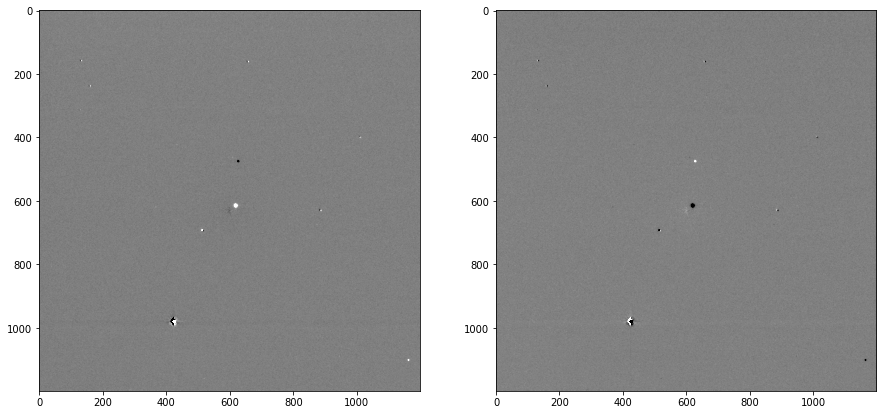

In [39]:
sub = im1[0].data - im2[0].data
fig, ax = plt.subplots(1,2, figsize = (15,15))
ax[0].imshow(sub, vmin = -40, vmax = 40, cmap='gray')
ax[1].imshow(sub, vmin = -40, vmax = 40, cmap='gray_r')
# sometimes the inverted image will make the object easier to identify

## Saving a figure to a directory
Inline plotting like what we've been doing above is useful for quick viewing, but most of the time you'll want to save your figure to a folder somewhere and in a specific format.  Let's save one of the figures above to disk:

In [40]:
x=np.arange(10)+1.
y1=x**2
y2=np.sqrt(x)

fig, ax = plt.subplots()
ax.set_yscale('log')
ax.plot(x,y1,color='blue',marker='*',ms=15,ls='None',label='$y=x^2$')
ax.plot(x,y2,color='red',marker='s',ms=15,ls='None',label='$y=\sqrt{x}$')
ax.text(6,10,'Hi there!')
ax.legend(loc='upper left',fontsize=16,numpoints=1)

# Note these two lines
fig.savefig('example.pdf',format='pdf')
plt.close()

# Analyze one of these data sets by making figures...
Now that you've learned the basics of Python and its plotting package, `matplotlib`, download one of these data sets, make some figures, and tell us what you see:
- **Galaxies**: 
    - Data: [galsample1.dat](https://dl.dropboxusercontent.com/u/28917100/carnegie/summer2016/galsample1.dat), [galsample2.dat](https://dl.dropboxusercontent.com/u/28917100/carnegie/summer2016/galsample2.dat)
    - The two files represent two different galaxy samples.  The columns represent, (1) the galaxy ID, (2) right ascension (RA) in units of decimal degrees, (3) declination (Dec) in units of decimal degrees (i.e., latter two columns are similar to longitude and latitude, but project on the sky), (4) the redshift (i.e., a measure of the recession velocity due to the Doppler shift of light from the galaxy.  If one assumes a cosmology, the redshift translates into a distance), (5), the total stellar mass of the galaxy in units of $\log(M/M_{\odot})$, and (6) the star formation rate of the galaxy in units of $M_{\odot}~{\rm yr}^{-1}$.
        - What is the difference between the two samples? Qualitatively, and quantitatively?
- **Supernovae**:
    - Data: [SNIa_DM.dat](https://dl.dropboxusercontent.com/u/28917100/carnegie/summer2016/SNIa_DM.dat)
    - There are five columns: SN name, redshift (`zcmb`), Distance modulus (`DM`), error `eDM`, and a survey number.
    - Try plotting a Hubble diagram (`DM` on the y-axis, `zcmb` on the x-axis) with errorbars.
    - Use logarithmic x-axis to make the Hubble diagram straight.
    - Plot the two different surveys in different colors/symbols.
    - Try plotting different *theoretical* Hubble laws (with different Hubble constants) with lines:
      $$ DM = 5\log_{10}\left(\frac{cz}{H_0}\right) + 25 $$
    - Do chi-by-eye to meausre $H_0$. Note that if $H_0$ is in $km/s/Mpc$, then $c = 3\times 10^{5} km/s$.
    
# More Advanced Visualization
There's tons more "out there" for helping you visualize your data. In the folder you downloaded, there is another `ipython` notebook called `Skyfit.ipynb` which shows you an example of using one such package:  `Bokeh`. We encourage you to have a look at it, as it may give you ideas for handling your own summer research project. The math is pretty dense, but the real point is to see how data can be manipulated, fit, and visualized.